In [ ]:
# x =[]
# while 1:
#   k = 1
#   x.append(k)

In [ ]:
# pip install --upgrade category_encoders

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9961894345919795939, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3559624028641385510
 physical_device_desc: "device: XLA_CPU device"]

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy
import glob
import pylab as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
from skimage import io, color
from numpy import save
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import SVC classifier
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
# import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from imblearn.metrics import sensitivity_specificity_support
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [4]:
# Coviddf = pd.read_csv('/content/drive/My Drive/final_dataset/CovidPreprocess.csv')
Nordf = pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/NorWave - Sheet1.csv')
# Coviddf = pd.read_csv('/content/drive/My Drive/(Prasun)AllCodes&Results/CovWave - Sheet1.csv')
pneudf = pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/PneuWave - Sheet1.csv')

In [5]:
# CNNCoviddf =pd.read_csv("/content/drive/My Drive/final_dataset/CNNcovidfeature.csv")
CNN_nordf =pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/NorCNN - Sheet1.csv')

# CNNpneumoniadf  = CNNpneumoniadf .drop(columns=['Unnamed: 0'])
# CNN_Coviddf =pd.read_csv("/content/drive/My Drive/(Prasun)AllCodes&Results/Cov3ClassCNN - Sheet1.csv")
CNN_pneudf = pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/PneuCNN - Sheet1.csv')
# CNNCoviddf = CNNNormaldf.drop(columns=['Unnamed: 0'])

In [6]:
MergedNor = pd.concat([ CNN_nordf  ,Nordf] ,axis = 1)
#MergedNor  = MergedNor.replace(np.NaN,0)
print(MergedNor)
# MergedCovid = pd.concat([ CNN_Coviddf ,Coviddf ] ,axis = 1)
# print(MergedCovid)
MergedPneu = pd.concat([CNN_pneudf ,pneudf ],axis = 1)
print(MergedPneu)

             0         1         2  ...         50173     50174     50175
0     0.000000  0.000000  0.006169  ... -3.921561e-03  0.003922  0.043137
1     0.000000  0.032724  0.021576  ...  0.000000e+00  0.000000  0.000000
2     0.000000  0.000000  0.006025  ...  0.000000e+00  0.000000  0.000000
3     0.000000  0.000000  0.051240  ...  4.656613e-10  0.000000  0.000000
4     0.000000  0.000000  0.000000  ...  0.000000e+00  0.000000  0.000000
...        ...       ...       ...  ...           ...       ...       ...
1344  0.000000  0.000000  0.000000  ...  1.960784e-03  0.001961  0.000000
1345  0.000000  0.000000  0.010233  ... -3.921568e-03 -0.001961  0.013725
1346  0.000747  0.002282  0.000000  ... -4.509804e-02 -0.039216  0.086275
1347  0.000000  0.000000  0.000000  ...  0.000000e+00  0.000000  0.000000
1348  0.000000  0.000000  0.000000  ...  0.000000e+00  0.000000  0.000000

[1349 rows x 100352 columns]
        0    1        2         3    4  ...  50171  50172  50173  50174  50175
0  

In [7]:
# folder = glob.glob('/content/drive/My Drive/final_dataset/pneumonia/*')
label = 'normal'
normallabels =[]
for k in range(1349):
  normallabels.append(label)

In [8]:


label = 'pneumonia'
pneulabels =[]
for k in range(3883):
  pneulabels.append(label)

In [9]:
MergedNor['Label'] =   normallabels
print(MergedNor)

             0         1         2  ...     50174     50175   Label
0     0.000000  0.000000  0.006169  ...  0.003922  0.043137  normal
1     0.000000  0.032724  0.021576  ...  0.000000  0.000000  normal
2     0.000000  0.000000  0.006025  ...  0.000000  0.000000  normal
3     0.000000  0.000000  0.051240  ...  0.000000  0.000000  normal
4     0.000000  0.000000  0.000000  ...  0.000000  0.000000  normal
...        ...       ...       ...  ...       ...       ...     ...
1344  0.000000  0.000000  0.000000  ...  0.001961  0.000000  normal
1345  0.000000  0.000000  0.010233  ... -0.001961  0.013725  normal
1346  0.000747  0.002282  0.000000  ... -0.039216  0.086275  normal
1347  0.000000  0.000000  0.000000  ...  0.000000  0.000000  normal
1348  0.000000  0.000000  0.000000  ...  0.000000  0.000000  normal

[1349 rows x 100353 columns]


In [10]:
MergedPneu['Label'] = pneulabels
print(MergedPneu)

        0    1        2         3    4  ...  50172  50173  50174  50175      Label
0     0.0  0.0  0.00000  0.019723  0.0  ...    0.0    0.0   -0.5    0.0  pneumonia
1     0.0  0.0  0.00000  0.000000  0.0  ...    1.5    0.5   -1.0    0.0  pneumonia
2     0.0  0.0  0.00000  0.012602  0.0  ...    0.0    0.0    0.0    0.0  pneumonia
3     0.0  0.0  0.00000  0.000000  0.0  ...    0.0    0.0    0.0    0.0  pneumonia
4     0.0  0.0  0.00000  0.025933  0.0  ...   -1.0   -1.5    1.0    0.0  pneumonia
...   ...  ...      ...       ...  ...  ...    ...    ...    ...    ...        ...
3878  0.0  0.0  0.00118  0.000000  0.0  ...    0.0    0.0    0.0    0.0  pneumonia
3879  0.0  0.0  0.00000  0.004584  0.0  ...   -0.5    0.5    0.0    0.0  pneumonia
3880  0.0  0.0  0.00000  0.033352  0.0  ...   -2.5    1.5    4.5    9.5  pneumonia
3881  0.0  0.0  0.00000  0.021979  0.0  ...   -5.5    3.0    4.0    4.5  pneumonia
3882  0.0  0.0  0.00000  0.000000  0.0  ...    1.5   -1.0    0.5   30.0  pneumonia

[38

In [11]:
del normallabels,pneulabels

In [12]:
TotalDataset = pd.concat([MergedNor,MergedPneu])
print(TotalDataset)

        0         1         2  ...     50174      50175      Label
0     0.0  0.000000  0.006169  ...  0.003922   0.043137     normal
1     0.0  0.032724  0.021576  ...  0.000000   0.000000     normal
2     0.0  0.000000  0.006025  ...  0.000000   0.000000     normal
3     0.0  0.000000  0.051240  ...  0.000000   0.000000     normal
4     0.0  0.000000  0.000000  ...  0.000000   0.000000     normal
...   ...       ...       ...  ...       ...        ...        ...
3878  0.0  0.000000  0.001180  ...  0.000000   0.000000  pneumonia
3879  0.0  0.000000  0.000000  ...  0.000000   0.000000  pneumonia
3880  0.0  0.000000  0.000000  ...  4.500000   9.500000  pneumonia
3881  0.0  0.000000  0.000000  ...  4.000000   4.500000  pneumonia
3882  0.0  0.000000  0.000000  ...  0.500000  30.000000  pneumonia

[5232 rows x 100353 columns]


In [13]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
TotalDataset['Label_Numerical'] = labelencoder.fit_transform(TotalDataset['Label'])
print(TotalDataset)

        0         1         2  ...      50175      Label  Label_Numerical
0     0.0  0.000000  0.006169  ...   0.043137     normal                0
1     0.0  0.032724  0.021576  ...   0.000000     normal                0
2     0.0  0.000000  0.006025  ...   0.000000     normal                0
3     0.0  0.000000  0.051240  ...   0.000000     normal                0
4     0.0  0.000000  0.000000  ...   0.000000     normal                0
...   ...       ...       ...  ...        ...        ...              ...
3878  0.0  0.000000  0.001180  ...   0.000000  pneumonia                1
3879  0.0  0.000000  0.000000  ...   0.000000  pneumonia                1
3880  0.0  0.000000  0.000000  ...   9.500000  pneumonia                1
3881  0.0  0.000000  0.000000  ...   4.500000  pneumonia                1
3882  0.0  0.000000  0.000000  ...  30.000000  pneumonia                1

[5232 rows x 100354 columns]


In [14]:
TotalDataset = shuffle(TotalDataset)
print(TotalDataset)

             0         1         2  ...         50175      Label  Label_Numerical
1282  0.000000  0.000000  0.000000  ...  0.000000e+00  pneumonia                1
936   0.000000  0.012257  0.000000  ...  0.000000e+00  pneumonia                1
588   0.000000  0.000000  0.000871  ... -9.313226e-10     normal                0
1324  0.000000  0.000000  0.001477  ...  0.000000e+00     normal                0
1307  0.000000  0.000000  0.000000  ...  0.000000e+00     normal                0
...        ...       ...       ...  ...           ...        ...              ...
2707  0.000000  0.000000  0.000000  ...  8.000000e+00  pneumonia                1
1106  0.000000  0.000000  0.000000  ...  0.000000e+00  pneumonia                1
3565  0.000000  0.000000  0.000000  ...  0.000000e+00  pneumonia                1
739   0.000000  0.000000  0.000000  ...  0.000000e+00  pneumonia                1
294   0.000237  0.000000  0.001611  ...  3.600000e+01  pneumonia                1

[5232 rows x 10

In [15]:

Featuredf = TotalDataset.drop(['Label','Label_Numerical'], axis=1)
Targetclass = TotalDataset['Label_Numerical']


In [16]:
print(Featuredf)
print(Targetclass)

             0         1         2  ...      50173     50174         50175
1282  0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000e+00
936   0.000000  0.012257  0.000000  ...   0.000000  0.000000  0.000000e+00
588   0.000000  0.000000  0.000871  ...   0.009804  0.001961 -9.313226e-10
1324  0.000000  0.000000  0.001477  ...   0.001961  0.000000  0.000000e+00
1307  0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000e+00
...        ...       ...       ...  ...        ...       ...           ...
2707  0.000000  0.000000  0.000000  ...  -1.000000 -3.000000  8.000000e+00
1106  0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000e+00
3565  0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000e+00
739   0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000e+00
294   0.000237  0.000000  0.001611  ...  54.000000  3.500000  3.600000e+01

[5232 rows x 100352 columns]
1282    1
936     1
588     0
1324    0
1307    0
       ..
2707    1


In [ ]:
# cols = Featuredf.columns

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# # scaler = StandardScaler()

# # Featuredf = scaler.fit_transform(Featuredf)
# scaler = MinMaxScaler(feature_range=(0, 1))

# Featuredf = scaler.fit_transform(Featuredf)

In [ ]:
# Featuredf= pd.DataFrame(Featuredf, columns=[cols])
# print(Featuredf)
# # Targetclass = pd.DataFrame(Targetclass)
# # print(Targetclass)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(Featuredf,Targetclass, test_size = 0.2, random_state = 0)

In [ ]:
# cols = X_train.columns


# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# # instantiate classifier with sigmoid kernel and C=100.0
# sigmoid_svc1=SVC(kernel='sigmoid', C=1.0) 


# # fit classifier to training set
# sigmoid_svc1.fit(X_train,y_train)


# # make predictions on test set
# y_pred=sigmoid_svc1.predict(X_test)


# # compute and print accuracy score
# print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.6f}'. format(accuracy_score(y_test, y_pred)))

In [17]:
del MergedNor,MergedPneu,Nordf,pneudf,CNN_nordf,CNN_pneudf

In [18]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [19]:
# knn3 = KNeighborsClassifier(n_neighbors=3)
# gnb = GaussianNB()
# rfc = RandomForestClassifier(n_estimators=100 ,random_state=0)
#clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# xgb_clf = XGBClassifier()
# gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1,  max_depth=3, random_state=0)

logreg = LogisticRegression()

cv = KFold(n_splits= 5, random_state=0, shuffle=True)
# Y_Pred =[]
# Y_test =[]
Acc =[]
# CM =[]
CLssrep =[]
ClassAcc =[]
PREC =[]
SENS =[]
SPEC =[]
# FalPos =[]
F1Score =[]

for train_index, test_index in cv.split(Featuredf ,Targetclass ):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train, X_test = Featuredf.iloc[train_index], Featuredf.iloc[test_index]
    y_train ,y_test =  Targetclass.iloc[train_index], Targetclass.iloc[test_index]
    # print(X_test)
    # print(y_test)
    cols = X_train.columns
   

  
    
    scaler = MinMaxScaler()
 

    X_train = scaler.fit_transform(X_train)

    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])
    
   
    # Y_test.append(y_test)

    logreg.fit(X_train,y_train)

    y_pred=logreg.predict(X_test)
  
    # Y_Pred.append(y_pred)

    acc = accuracy_score(y_test, y_pred)
    
    Acc.append(acc)
    
    cm = confusion_matrix(y_test , y_pred)
    
    # CM.append(cm)



    classification_accuracy = accuracy(cm)
    ClassAcc.append(classification_accuracy)


    [Precision,Sensitivity,F1_score,_] = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    [_, Specificity,_] = sensitivity_specificity_support(y_test, y_pred, average='weighted')

    PREC.append(Precision)
    SENS.append(Sensitivity)
    SPEC.append(Specificity)
    # FalPos.append(false_positive_rate)
    F1Score.append(F1_score)
    
    # print('Precision : {0:0.6f}'.format(Precision))
    # print('Sensitivity : {0:0.6f}'.format(Sensitivity))
    # print('Specificity : {0:0.6f}'.format(Specificity))
    # print('F1_score : {0:0.6f}'.format(F1_score))
    # # print('False Positive Rate : {0:0.6f}'.format(false_positive_rate))

print('Mean Model accuracy score with sigmoid kernel and C=1.0 : {0:0.6f}'. format(np.mean(Acc)))
print('Mean Classification accuracy : {0:0.6f}'.format(np.mean(ClassAcc)))

print('Mean Precision : {0:0.6f}'.format(np.mean(PREC)))
print('Mean Sensitivity : {0:0.6f}'.format(np.mean(SENS)))
print('Mean Specificity : {0:0.6f}'.format(np.mean(SPEC)))
print('Mean F1_score : {0:0.6f}'.format(np.mean(F1Score)))
# print('Mean False Positive Rate : {0:0.6f}'.format(np.mean(FalPos)))


Mean Model accuracy score with sigmoid kernel and C=1.0 : 1.000000
Mean Classification accuracy : 1.000000
Mean Precision : 1.000000
Mean Sensitivity : 1.000000
Mean Specificity : 1.000000
Mean F1_score : 1.000000


In [20]:
print(Acc)
print(PREC)
print(SENS)
print(SPEC)
print(F1Score)

[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


In [21]:
# for k in range(len(CM)):
#   cm_matrix = pd.DataFrame(data=CM[k], columns=[' PredNormal:0', 'PredPne:1'], 
#                         index=['ActNormal:0', 'ActPneu:1'])
#   fig, ax = plt.subplots()
#   sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
#   plt.tight_layout()
0.9859237148443754, 0.9793735096027574, 0.96409317933234, 0.9789720941905234, 0.9554189544043924, 0.9869955756154052, 0.9826020199894587, 0.9751866584482035, 0.986658688327118, 0.9846587207495133

# for k in range(len(CM)):

#   df_cm = pd.DataFrame(CM[k], index=['covid','normal','pneu'], columns= ['covid','normal','pneu'] )
#   fig,ax = plt.subplots() 
#   heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
#   heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize= 14)
#   heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize= 14)
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.tight_layout()


(0.9859237148443754,
 0.9793735096027574,
 0.96409317933234,
 0.9789720941905234,
 0.9554189544043924,
 0.9869955756154052,
 0.9826020199894587,
 0.9751866584482035,
 0.986658688327118,
 0.9846587207495133)

In [22]:
for k in range(len(Acc)):
  clssrep = classification_report(Y_test[k], Y_Pred[k])
  print(clssrep)

NameError: ignored

In [ ]:
# # Run classifier with cross-validation and plot ROC curves
# # cv = StratifiedKFold(n_splits=6)
# # classifier = svm.SVC(kernel='linear', probability=True,
# #                      random_state=random_state)

# # sigmoid_svc1=SVC(kernel='sigmoid', C=1.0) 

# # cv = KFold(n_splits=10, random_state=0, shuffle=True)
# from sklearn.preprocessing import label_binarize
# # Targetclass = label_binarize(Targetclass, classes=[0,1,2])
#     # n_classes = 3
# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# fig, ax = plt.subplots(figsize=(12 ,10))
# for i, (train, test) in enumerate(cv.split(Featuredf ,Targetclass)):
    
#     X_train, X_test = Featuredf.iloc[train], Featuredf.iloc[test]
#     y_train ,y_test =  Targetclass.iloc[train], Targetclass.iloc[test]
#     y_train = label_binarize(y_train,classes =[0,1,2])
#     y_test = label_binarize(y_test,classes = [0,1,2])
#     cols = X_train.columns
    
#     # y = label_binarize(y, classes=[0,1,2])
#     # n_classes = 3

#     scaler = MinMaxScaler()
#     X_train = scaler.fit_transform(X_train)

#     X_test = scaler.transform(X_test)
#     X_train = pd.DataFrame(X_train, columns=[cols])
#     X_test = pd.DataFrame(X_test, columns=[cols])
#     # logreg = LogisticRegression()
#     logreg = OneVsRestClassifier( LogisticRegression())
#     logreg.fit(X_train, y_train)

#     viz = plot_roc_curve(logreg,X_test,y_test,name='ROC fold {}'.format(i), ax=ax)
#     interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label='Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="LogisticRegression Receiver operating characteristic")
# fig.savefig(os.path.join('/content/drive/My Drive/(Prasun)AllCodes&Results/CovVsNor10', '2ndLogisticRegression_ROC.png')) 
# ax.legend(loc="lower right")
# plt.show()

In [ ]:
# fpr, tpr, thresholds = roc_curve(y_test, y_score)
# def ROC_curve(fpr,tpr):
#     # Seaborn's beautiful styling
#     sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# print('AUC: {}'.format(auc(fpr, tpr)))
#     plt.figure(figsize=(10, 8))
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',
#              lw=lw, label='ROC curve')
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.yticks([i/20.0 for i in range(21)])
#     plt.xticks([i/20.0 for i in range(21)])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic (ROC) Curve')
#     plt.legend(loc='lower right')
#     plt.show()
    
# ROC_curve(fpr,tpr)

In [23]:
# Coviddf = pd.read_csv('/content/drive/My Drive/final_dataset/CovidPreprocess.csv')
TestNormaldf = pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testNorWave - Sheet1.csv')
# TestCoviddf = pd.read_csv('/content/drive/My Drive/(Prasun)AllCodes&Results/TestCovWave - Sheet1.csv')
TestPneudf = pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/testPneuWave - Sheet1.csv')

In [ ]:
TestCNN_nordf =pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/TestNorCNN - Sheet1.csv')

# CNNpneumoniadf  = CNNpneumoniadf .drop(columns=['Unnamed: 0'])
# TestCNN_Coviddf =pd.read_csv("/content/drive/My Drive/(Prasun)AllCodes&Results/TestCov3ClassCNN - Sheet1.csv")
TestCNN_Pneudf = pd.read_csv('/content/drive/Shared drives/COVID_19/PrasunAll_Materials/TestPneuCNN - Sheet1.csv')

In [ ]:
TestMergedNor = pd.concat([ TestCNN_nordf  ,TestNormaldf  ] ,axis = 1)
TestMergedNor = TestMergedNor.replace(np.NaN,0)
print(TestMergedNor )

TestMergedPneu = pd.concat ([TestCNN_Pneudf ,TestPneudf],axis = 1 )
print(TestMergedPneu)



            0    1         2  ...     50173         50174         50175
0    0.000000  0.0  0.000000  ...  0.000000  1.960784e-03  1.960784e-03
1    0.000000  0.0  0.000000  ...  0.000000 -4.656613e-10 -2.328306e-10
2    0.000000  0.0  0.000000  ... -0.001961  1.960784e-03  3.921567e-03
3    0.000698  0.0  0.000000  ...  0.072549  3.137255e-02  1.196078e-01
4    0.000000  0.0  0.000000  ...  0.001961  1.960784e-03  0.000000e+00
..        ...  ...       ...  ...       ...           ...           ...
229  0.000000  0.0  0.011363  ...  0.000000  0.000000e+00  0.000000e+00
230  0.000000  0.0  0.000000  ...  0.000000 -1.960784e-03  0.000000e+00
231  0.000000  0.0  0.000000  ...  0.000000  0.000000e+00  0.000000e+00
232  0.000000  0.0  0.015200  ...  0.000000  0.000000e+00  0.000000e+00
233  0.000000  0.0  0.032066  ...  0.023529 -1.960784e-03  0.000000e+00

[234 rows x 100352 columns]
       0         1    2         3  ...  50172  50173  50174  50175
0    0.0  0.000000  0.0  0.000000  ...  

In [ ]:
# folder = glob.glob('/content/drive/My Drive/final_dataset/pneumonia/*')
label = 'normal'
TestNormallabels =[]
for k in range(234):
  TestNormallabels.append(label)



label = 'pneumonia'
TestPneulabels =[]
for k in range(390):
  TestPneulabels.append(label)



In [ ]:
TestMergedNor['Label'] =  TestNormallabels
print(TestMergedNor)

TestMergedPneu['Label'] = TestPneulabels
print(TestMergedPneu)
del TestNormallabels,TestPneulabels

            0    1         2  ...         50174         50175   Label
0    0.000000  0.0  0.000000  ...  1.960784e-03  1.960784e-03  normal
1    0.000000  0.0  0.000000  ... -4.656613e-10 -2.328306e-10  normal
2    0.000000  0.0  0.000000  ...  1.960784e-03  3.921567e-03  normal
3    0.000698  0.0  0.000000  ...  3.137255e-02  1.196078e-01  normal
4    0.000000  0.0  0.000000  ...  1.960784e-03  0.000000e+00  normal
..        ...  ...       ...  ...           ...           ...     ...
229  0.000000  0.0  0.011363  ...  0.000000e+00  0.000000e+00  normal
230  0.000000  0.0  0.000000  ... -1.960784e-03  0.000000e+00  normal
231  0.000000  0.0  0.000000  ...  0.000000e+00  0.000000e+00  normal
232  0.000000  0.0  0.015200  ...  0.000000e+00  0.000000e+00  normal
233  0.000000  0.0  0.032066  ... -1.960784e-03  0.000000e+00  normal

[234 rows x 100353 columns]
       0         1    2         3    4  ...  50172  50173  50174  50175      Label
0    0.0  0.000000  0.0  0.000000  0.0  ...    0

In [ ]:
TestTotalDataset = pd.concat([TestMergedNor,TestMergedPneu])
print(TestTotalDataset)
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
TestTotalDataset['Label_Numerical'] = labelencoder.fit_transform(TestTotalDataset['Label'])
print(TestTotalDataset)
TestTotalDataset = shuffle(TestTotalDataset)
print(TestTotalDataset)

            0         1    2  ...         50174         50175      Label
0    0.000000  0.000000  0.0  ...  1.960784e-03  1.960784e-03     normal
1    0.000000  0.000000  0.0  ... -4.656613e-10 -2.328306e-10     normal
2    0.000000  0.000000  0.0  ...  1.960784e-03  3.921567e-03     normal
3    0.000698  0.000000  0.0  ...  3.137255e-02  1.196078e-01     normal
4    0.000000  0.000000  0.0  ...  1.960784e-03  0.000000e+00     normal
..        ...       ...  ...  ...           ...           ...        ...
385  0.000000  0.025208  0.0  ...  3.500000e+00  2.000000e+00  pneumonia
386  0.000000  0.000000  0.0  ...  1.500000e+00  0.000000e+00  pneumonia
387  0.000000  0.000000  0.0  ...  0.000000e+00  0.000000e+00  pneumonia
388  0.000000  0.010323  0.0  ...  0.000000e+00  0.000000e+00  pneumonia
389  0.000000  0.000000  0.0  ...  0.000000e+00  0.000000e+00  pneumonia

[624 rows x 100353 columns]
            0         1    2  ...         50175      Label  Label_Numerical
0    0.000000  0.00

In [ ]:
TestFeaturedf = TestTotalDataset.drop(['Label','Label_Numerical'], axis=1)
TestTargetclass = TestTotalDataset['Label_Numerical']
TestTargetclass

290    1
113    0
147    1
295    1
74     1
      ..
104    1
8      0
47     0
127    0
129    1
Name: Label_Numerical, Length: 624, dtype: int64

In [ ]:
cols = TestFeaturedf.columns
print(cols)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '50166', '50167', '50168', '50169', '50170', '50171', '50172', '50173',
       '50174', '50175'],
      dtype='object', length=100352)


In [ ]:
# cols = X_train.columns
scaler = MinMaxScaler()
TestFeaturedf = scaler.fit_transform(TestFeaturedf)
TestFeaturedf = pd.DataFrame(TestFeaturedf, columns=[cols])
print(TestFeaturedf)

       0       1    2         3  ...     50172     50173     50174     50175
0    0.0  0.0000  0.0  0.000000  ...  0.527586  0.629310  0.448795  0.144928
1    0.0  0.0000  0.0  0.000000  ...  0.527897  0.629361  0.448760  0.144946
2    0.0  0.0000  0.0  0.395155  ...  0.524138  0.633621  0.448795  0.149758
3    0.0  0.0000  0.0  0.000000  ...  0.527586  0.629310  0.448795  0.144928
4    0.0  0.0000  0.0  0.178157  ...  0.524138  0.629310  0.448795  0.149758
..   ...     ...  ...       ...  ...       ...       ...       ...       ...
619  0.0  0.0891  0.0  0.182442  ...  0.520690  0.530172  0.659639  0.666667
620  0.0  0.0000  0.0  0.000000  ...  0.527559  0.629310  0.448831  0.145060
621  0.0  0.0000  0.0  0.174835  ...  0.527640  0.629327  0.448783  0.145022
622  0.0  0.0000  0.0  0.000000  ...  0.527302  0.628482  0.449492  0.146614
623  0.0  0.0000  0.0  0.086131  ...  0.527586  0.629310  0.448795  0.144928

[624 rows x 100352 columns]


[[234   0]
 [  0 390]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       390

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

Classification Accuracy:1.000000
Precision : 1.000000
Sensitivity : 1.000000
Specificity : 1.000000
F1_score : 1.000000


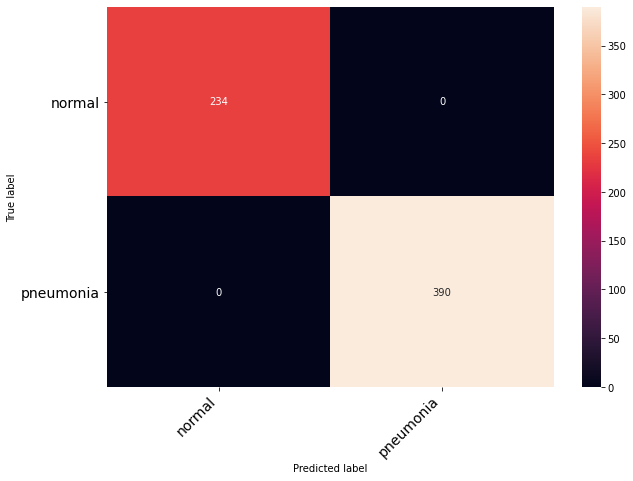

In [ ]:
PredTestTargetclass =logreg.predict(TestFeaturedf )
# PredTestTargetclass
acc = accuracy_score(TestTargetclass,PredTestTargetclass )
    
 
cm = confusion_matrix(TestTargetclass, PredTestTargetclass)

print(cm)


clssrep = classification_report(TestTargetclass, PredTestTargetclass)
    # CLssrep.append(clssrep)
print(clssrep)


df_cm = pd.DataFrame(cm, index=['normal','pneumonia'], columns= ['normal','pneumonia'] )
fig = plt.figure(figsize = (10,7))

heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize= 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize= 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

classification_accuracy = accuracy(cm)
print("Classification Accuracy:{0:0.6f}".format(classification_accuracy))

[Precision,Sensitivity,F1_score,_] = precision_recall_fscore_support(TestTargetclass,PredTestTargetclass, average='weighted')
[_, Specificity,_] = sensitivity_specificity_support(TestTargetclass,PredTestTargetclass, average='weighted')



    
print('Precision : {0:0.6f}'.format(Precision))
print('Sensitivity : {0:0.6f}'.format(Sensitivity))
print('Specificity : {0:0.6f}'.format(Specificity))
print('F1_score : {0:0.6f}'.format(F1_score))
# print('False Positive Rate : {0:0.6f}'.format(false_positive_rate))
